# Задачи кластеризации + снижение размерности

Алгоритмы без учителя(с частичным привлечением учителя)

Схожи с алгоритмом k-ближайших соседей, так  как возникает некая близость данных и т.п.



# Метод k-средних

Алгоритм предполагает известное кол-во кластеров n

Сначала выбирает случайно n точек и считаем ближайшие точки своими, после пересчитываем центроиду (центр масс), перераспределяем точки в кластерах (теряем,получаем)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv("winequality_clear.csv")


In [17]:
df.drop('quality', axis=1,inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], shuffle=True,
                                                     stratify=df.iloc[:,-1], train_size=0.8, random_state=1240)
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
188,6.4,0.300,0.45,3.5,0.197,76.0,180.0,0.99420,3.02,0.39,9.1
2505,6.6,0.420,0.13,12.8,0.044,26.0,158.0,0.99772,3.24,0.47,9.0
5367,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.1
134,6.3,0.310,0.34,2.2,0.045,20.0,77.0,0.99270,3.30,0.43,10.2
350,7.1,0.365,0.14,1.2,0.055,24.0,84.0,0.99410,3.15,0.43,8.9


In [22]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_S = scaler.transform(x_train)

In [49]:
from sklearn.cluster import KMeans #делаем кластер с KMeas, нужно нормировать

clu = KMeans(n_clusters=2, random_state=1240)
clu.fit(x_train_S)

c:\Users\Hipor\projects\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=1240)

In [30]:
print(clu.cluster_centers_) #центры кластеров в нормированных координатах

[[-0.28725918 -0.39280776  0.10726976  0.20777077 -0.30171344  0.28357936
   0.40101546 -0.2313912  -0.18557098 -0.28204162  0.02947025]
 [ 0.84729389  1.15861783 -0.31640071 -0.61283647  0.88992787 -0.83643996
  -1.1828271   0.68250681  0.54735642  0.83190429 -0.08692484]]


In [48]:
clu.labels_ #метки для значений х по кластерам

array([1, 1, 1, ..., 1, 0, 1])

In [50]:
correct = sum(y_train==clu.labels_)

print(f"точность результата:{correct/y_train.size: .4f}", "\n" ,  correct ,"из",y_train.size)

точность результата: 0.9859 
 5097 из 5170


In [51]:
scaler.fit(x_test)
x_test_S = scaler.transform(x_test)
y_pred = clu.predict(x_test_S)

correct1 = sum(y_test==y_pred)

print(f"точность результата:{correct1/y_test.size: .4f}", "\n" ,  correct1 ,"из",y_test.size)

точность результата: 0.9853 
 1274 из 1293


# Метод аффинити пропагейшн (метод распространения близости)

Не требует кол-ва кластеров, стягивает все точки в какие-то области

In [52]:
from sklearn.cluster import AffinityPropagation #делаем кластер с AffinityPropagatio, нужно нормировать

clu2 = AffinityPropagation(random_state=1240)
clu2.fit(x_train_S)

AffinityPropagation(random_state=1240)

In [54]:
print("N = ", len(clu2.cluster_centers_))
print("homogeneity_score:",metrics.homogeneity_score(y_train, clu2.labels_), #как разрознены вина по кластерам, тут в одном кластере в основном одни вина
       "\ncompleteness_score:", metrics.completeness_score(y_train, clu2.labels_)) #а хер его знает ??????


N =  211
homogeneity_score: 0.9522301003445094 
completeness_score 0.10361704301011164


In [57]:
clu2 = AffinityPropagation(random_state=1240, preference=-400) #preference - параметр влияющий на кол-во кластеров, но напрямую задать сложно
clu2.fit(x_train_S)

AffinityPropagation(preference=-400, random_state=1240)

In [58]:
print("N = ", len(clu2.cluster_centers_))
print("homogeneity_score:",metrics.homogeneity_score(y_train, clu2.labels_), #как разрознены вина по кластерам, тут в одном кластере в основном одни вина
       "\ncompleteness_score:", metrics.completeness_score(y_train, clu2.labels_)) #а хер его знает ??????

N =  17
homogeneity_score: 0.8254299607537013 
completeness_score: 0.17231747180652146


In [59]:
!pip install rdkit-pypi

In [60]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem


In [64]:
df_small = pd.read_csv("chembl_drugs_small.csv")
df_small.head()

,Unnamed: 0,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,...,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES,ROMol,FP
0,0,675015,CHEMBL1201064,"Fluorometholone Acetate (FDA, USAN)",4,U-17323,Alcon Laboratories Inc,-olone,steroids (not prednisolone derivatives),-olone,...,N,Y,N,Prescription-only,NaN,NaN,NaN,C[C@H]1C[C@H]2[C@@H]3CC[C@](OC(=O)C)(C(=O)C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f91dc0e3f90>,[0. 0. 0. ... 0. 0. 0.]
1,4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,...,N,Y,Y,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,<rdkit.Chem.rdchem.Mol object at 0x7f91dc0e3eb0>,[0. 0. 0. ... 0. 0. 0.]
2,5,139014,CHEMBL1068,"Oxcarbazepine (BAN, FDA, INN, USAN)",4,GP-47680; KIN-493,Supernus Pharmaceuticals Inc; Novartis Pharmac...,-pin(e),tricyclic compounds,-pin(e),...,N,N,Y,Prescription-only,NaN,NaN,NaN,NC(=O)N1c2ccccc2CC(=O)c3ccccc13,<rdkit.Chem.rdchem.Mol object at 0x7f91dc0e3e40>,[0. 0. 0. ... 0. 0. 0.]
3,17,14785,CHEMBL553,"Erlotinib (INN); Erlotinib HCl (FDA, INN, USAN)",4,CP-358774; OSI-774; R-1415; RG-1415; Ro-508231...,Osi Pharmaceuticals Inc,-tinib,tyrosine kinase inhibitors,-tinib,...,N,N,N,Prescription-only,NaN,NaN,NaN,COCCOc1cc2ncnc(Nc3cccc(c3)C#C)c2cc1OCCOC,<rdkit.Chem.rdchem.Mol object at 0x7f91dc0e3cf0>,[0. 0. 0. ... 0. 0. 0.]
4,35,147956,CHEMBL1086,"Cinchocaine (BAN, INN); Dibucaine (USP); Cinch...",4,NaN,Novartis Pharmaceuticals Corp; Ciba-Geigy,-caine,local anesthetics,-caine,...,Y,N,N,Discontinued,NaN,NaN,NaN,CCCCOc1cc(C(=O)NCCN(CC)CC)c2ccccc2n1,<rdkit.Chem.rdchem.Mol object at 0x7f91dc0e3a50>,[0. 0. 0. ... 0. 0. 0.]


In [65]:
PandasTools.AddMoleculeColumnToFrame(df_small, smilesCol='CANONICAL_SMILES')

In [66]:
df_small.head()

,Unnamed: 0,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,...,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES,ROMol,FP
0,0,675015,CHEMBL1201064,"Fluorometholone Acetate (FDA, USAN)",4,U-17323,Alcon Laboratories Inc,-olone,steroids (not prednisolone derivatives),-olone,...,N,Y,N,Prescription-only,NaN,NaN,NaN,C[C@H]1C[C@H]2[C@@H]3CC[C@](OC(=O)C)(C(=O)C)[C...,<rdkit.Chem.rdchem.Mol object at 0x00000212187...,[0. 0. 0. ... 0. 0. 0.]
1,4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,...,N,Y,Y,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,<rdkit.Chem.rdchem.Mol object at 0x00000212187...,[0. 0. 0. ... 0. 0. 0.]
2,5,139014,CHEMBL1068,"Oxcarbazepine (BAN, FDA, INN, USAN)",4,GP-47680; KIN-493,Supernus Pharmaceuticals Inc; Novartis Pharmac...,-pin(e),tricyclic compounds,-pin(e),...,N,N,Y,Prescription-only,NaN,NaN,NaN,NC(=O)N1c2ccccc2CC(=O)c3ccccc13,<rdkit.Chem.rdchem.Mol object at 0x00000212187...,[0. 0. 0. ... 0. 0. 0.]
3,17,14785,CHEMBL553,"Erlotinib (INN); Erlotinib HCl (FDA, INN, USAN)",4,CP-358774; OSI-774; R-1415; RG-1415; Ro-508231...,Osi Pharmaceuticals Inc,-tinib,tyrosine kinase inhibitors,-tinib,...,N,N,N,Prescription-only,NaN,NaN,NaN,COCCOc1cc2ncnc(Nc3cccc(c3)C#C)c2cc1OCCOC,<rdkit.Chem.rdchem.Mol object at 0x00000212187...,[0. 0. 0. ... 0. 0. 0.]
4,35,147956,CHEMBL1086,"Cinchocaine (BAN, INN); Dibucaine (USP); Cinch...",4,NaN,Novartis Pharmaceuticals Corp; Ciba-Geigy,-caine,local anesthetics,-caine,...,Y,N,N,Discontinued,NaN,NaN,NaN,CCCCOc1cc(C(=O)NCCN(CC)CC)c2ccccc2n1,<rdkit.Chem.rdchem.Mol object at 0x00000212187...,[0. 0. 0. ... 0. 0. 0.]


In [67]:
def get_cfp(mol):
    arr = np.zeros((1,), dtype=float)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr
df_small['FP'] = df_small['ROMol'].map(get_cfp)

In [72]:
X = np.array([x for x in df_small["FP"]])
print(X.shape) # 150 фингерпритнтов по 1024 бита (1 и 0)

(150, 1024)


# PCA

уменьшаем размерность

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=1240)
pca_drugs = pca.fit_transform(X)
print(pca_drugs.shape) #сделали размерность 3

(150, 3)


In [77]:
df_small['PC1'] = pca_drugs.T[0]
df_small['PC2'] = pca_drugs.T[1]
df_small['PC3'] = pca_drugs.T[2]
df_small.head()

,Unnamed: 0,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,...,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES,ROMol,FP,PC1,PC2,PC3
0,0,675015,CHEMBL1201064,"Fluorometholone Acetate (FDA, USAN)",4,U-17323,Alcon Laboratories Inc,-olone,steroids (not prednisolone derivatives),-olone,...,Prescription-only,NaN,NaN,NaN,C[C@H]1C[C@H]2[C@@H]3CC[C@](OC(=O)C)(C(=O)C)[C...,<rdkit.Chem.rdchem.Mol object at 0x00000212187...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.853948,0.310926,2.035503
1,4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,...,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,<rdkit.Chem.rdchem.Mol object at 0x00000212187...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.028710,2.776398,-0.139620
2,5,139014,CHEMBL1068,"Oxcarbazepine (BAN, FDA, INN, USAN)",4,GP-47680; KIN-493,Supernus Pharmaceuticals Inc; Novartis Pharmac...,-pin(e),tricyclic compounds,-pin(e),...,Prescription-only,NaN,NaN,NaN,NC(=O)N1c2ccccc2CC(=O)c3ccccc13,<rdkit.Chem.rdchem.Mol object at 0x00000212187...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.115448,-0.028030,-0.311736
3,17,14785,CHEMBL553,"Erlotinib (INN); Erlotinib HCl (FDA, INN, USAN)",4,CP-358774; OSI-774; R-1415; RG-1415; Ro-508231...,Osi Pharmaceuticals Inc,-tinib,tyrosine kinase inhibitors,-tinib,...,Prescription-only,NaN,NaN,NaN,COCCOc1cc2ncnc(Nc3cccc(c3)C#C)c2cc1OCCOC,<rdkit.Chem.rdchem.Mol object at 0x00000212187...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1.348071,0.074677,-0.070790
4,35,147956,CHEMBL1086,"Cinchocaine (BAN, INN); Dibucaine (USP); Cinch...",4,NaN,Novartis Pharmaceuticals Corp; Ciba-Geigy,-caine,local anesthetics,-caine,...,Discontinued,NaN,NaN,NaN,CCCCOc1cc(C(=O)NCCN(CC)CC)c2ccccc2n1,<rdkit.Chem.rdchem.Mol object at 0x00000212187...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",-0.798367,-0.040131,0.308621


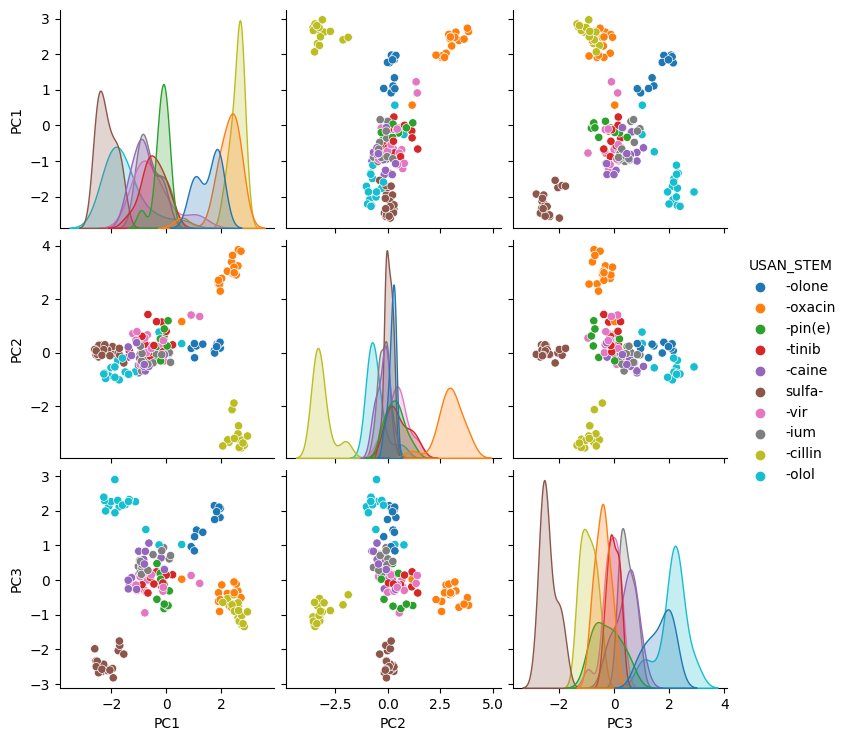

In [78]:
import seaborn as sns
sns.pairplot(df_small, hue='USAN_STEM', vars=['PC1', 'PC2', 'PC3'])
